In [12]:
# Import Dependencies and Twitter API Keys
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

from tweepy import API
from tweepy import Cursor

consumer_key = 'RqXwrJHDrJj3HdGfrn0x4IswX'
consumer_secret = '5YStxsGUlcKGqeVwzGQvqtUC7SOska1CfT7HGz3e9MDlyUCcOL'
access_token = '1377692090096709632-4na2oK5zvnoUbGScSX49hSss2tXitK'
access_token_secret = 'tHhHgcZAj2Z1ESzpwVIhPUqqggrSbwHPanwuMWjlGkIE4'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [452]:
#Target users 
target_users = ['twitter']

search_term = "#climate+change -filter:retweets"


# create variables to hold all the sentiments arrays, users, timestamp, tweets count
all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_compound_lists = []
all_pos_list = []
all_pos_lists = []
all_neu_list = []
all_neu_lists = []
all_neg_list = []
all_neg_lists = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []

# Gather the tweets and run vader on them

#Loop through 5 target users
for target_user in target_users:
    # create variables to hold temp the sentiments arrays, users, timestamp, tweets count
    user_list = []
    timestamp_list = []
    compound_list = []
    compound_lists = []
    pos_list = []
    pos_lists = []
    neu_list = []
    neu_lists = []
    neg_list = []
    neg_lists = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
    
     # Get all tweets from home feed, loop through 5 pages of tweets (100 tweets)
    for x in range(1):


        # loop through the tweet
        for tweet in tweepy.Cursor(api.search, q = search_term, lang= 'en').items(1000):

            # Run Vader Analysis on each tweet
            timestamp = tweet.created_at
            compound = analyzer.polarity_scores(tweet.text)["compound"]
            pos = analyzer.polarity_scores(tweet.text)["pos"]
            neu = analyzer.polarity_scores(tweet.text)["neu"]
            neg = analyzer.polarity_scores(tweet.text)["neg"]


            # Add each value to the appropriate list
            user_list.append(tweet.user.name)
            timestamp_list.append(timestamp)
            
            compound_lists.append(compound)
            if compound > 0:
                compound = 1
                compound_list.append(compound)
                
            elif compound == 0:
                compound = 0
                compound_list.append(compound)
                
            else:
                compound = -1
                compound_list.append(compound)
                
                
                
            pos_lists.append(pos)
            if pos > 0:
                pos = 1
                pos_list.append(pos)
                
            else:
                pos = 0
                pos_list.append(pos)
                
                
                
            neu_lists.append(neu)
            if neu > 0:
                neu = 1
                neu_list.append(neu)
                
            else:
                neu = 0
                neu_list.append(neu)
                
                
                
            neg_lists.append(neg)
            if neg > 0:
                neg = 1
                neg_list.append(neg)
                
            else:
                neg = 0
                neg_list.append(neg)
                
            
            
            text_list.append(tweet.text)
            tweets_ago_list.append(tweet_count)
            tweet_count += 1


    # Add each value to the consolidated list       
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)
    all_compound_list.append(compound_list)
    all_compound_lists.append(compound_lists)
    all_pos_list.append(pos_list)
    all_pos_lists.append(pos_lists)
    all_neu_list.append(neu_list)
    all_neu_lists.append(neu_lists)
    all_neg_list.append(neg_list)
    all_neg_lists.append(neg_lists)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)

    # Store the Average of compound Sentiments    
    sentiments = np.mean(compound_lists)
    print(sentiments)
    all_sentiment_list.append(sentiments)


0.0798887


In [539]:
#Flatten each list of user variables to consolidate list example: a = np.array([[1,2], [3,4]])>>> a.flatten() 
#array([1, 2, 3, 4]) 

all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_compound_lists = np.array(all_compound_lists).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_pos_lists = np.array(all_pos_lists).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neu_lists = np.array(all_neu_lists).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_neg_lists = np.array(all_neg_lists).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()


In [542]:
#Create Dictionary of above variables
sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Actual_Compound_Score': all_compound_lists,
             'Actual_Pos_Score': all_pos_lists, 'Actual_neu_Score': all_neu_lists, 'Actual_neg_Score': all_neg_lists,
             'Tweets_Ago': all_tweets_ago_list,'Tweet_Text': all_text_list,
             'Compound_Score': all_compound_list, 'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list 
             }

#Convert Dictionary to data frame
sentiment_df = pd.DataFrame(sentiment)


# Export Dataframe to CSV
sentiment_df.to_csv("Twitter_News_Sentiment_Raw.csv", index=False, header=True)

#Display DataFrame
sentiment_df

    

,User,Timestamp,Actual_Compound_Score,Actual_Pos_Score,Actual_neu_Score,Actual_neg_Score,Tweets_Ago,Tweet_Text,Compound_Score,Pos_Score,Neu_Score,Neg_Score
0,do Different.,2021-04-19 06:25:42,0.2732,0.095,0.905,0.000,0,🌍 Ahead of the Pre- @P4Gpartnerships Summit th...,1,1,1,0
1,Ville Kostian,2021-04-19 06:11:30,0.0000,0.000,1.000,0.000,1,"""#Biden pressed on emissions goal as #climate ...",0,0,1,0
2,xprimmcom,2021-04-19 06:09:50,0.2732,0.185,0.701,0.115,2,Climate change-related litigation is a truly g...,1,1,1,1
3,impakterdotcom,2021-04-19 06:06:01,-0.7269,0.000,0.663,0.337,3,"As #climate change continues to worsen, #ecolo...",-1,0,1,1
4,Kratu Energy Solutions,2021-04-19 06:03:11,-0.1027,0.208,0.644,0.148,4,The image tells us the importance of #trees i...,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Chris Fox,2021-04-13 13:29:33,0.0000,0.000,1.000,0.000,995,"""More than 300 businesses and investors, inclu...",0,0,1,0
996,Fiona Reynolds,2021-04-13 13:28:42,0.1010,0.080,0.920,0.000,996,Why #accounting really matters for #climate ch...,1,1,1,0
997,Krista Karger,2021-04-13 13:26:11,-0.4215,0.000,0.859,0.141,997,"#ESG Task Force, 2021 exam priorities, #climat...",-1,0,1,1
998,Inger Andersen,2021-04-13 13:21:55,0.4019,0.124,0.876,0.000,998,"A post-#COVID19 world must be inclusive, sust...",1,1,1,0


In [543]:
twitter_sentiments  = pd.read_csv('Twitter_News_Sentiment_Raw.csv')

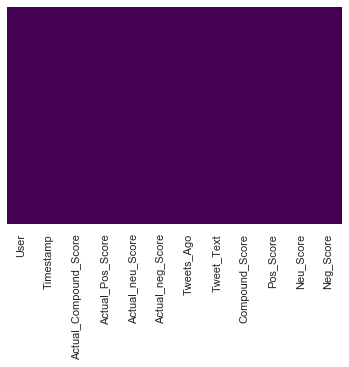

In [544]:
sns.heatmap(twitter_sentiments.isnull() , yticklabels= False, cbar= False, cmap= 'viridis')

In [545]:
twitter_sentiments

,User,Timestamp,Actual_Compound_Score,Actual_Pos_Score,Actual_neu_Score,Actual_neg_Score,Tweets_Ago,Tweet_Text,Compound_Score,Pos_Score,Neu_Score,Neg_Score
0,do Different.,2021-04-19 06:25:42,0.2732,0.095,0.905,0.000,0,🌍 Ahead of the Pre- @P4Gpartnerships Summit th...,1,1,1,0
1,Ville Kostian,2021-04-19 06:11:30,0.0000,0.000,1.000,0.000,1,"""#Biden pressed on emissions goal as #climate ...",0,0,1,0
2,xprimmcom,2021-04-19 06:09:50,0.2732,0.185,0.701,0.115,2,Climate change-related litigation is a truly g...,1,1,1,1
3,impakterdotcom,2021-04-19 06:06:01,-0.7269,0.000,0.663,0.337,3,"As #climate change continues to worsen, #ecolo...",-1,0,1,1
4,Kratu Energy Solutions,2021-04-19 06:03:11,-0.1027,0.208,0.644,0.148,4,The image tells us the importance of #trees i...,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Chris Fox,2021-04-13 13:29:33,0.0000,0.000,1.000,0.000,995,"""More than 300 businesses and investors, inclu...",0,0,1,0
996,Fiona Reynolds,2021-04-13 13:28:42,0.1010,0.080,0.920,0.000,996,Why #accounting really matters for #climate ch...,1,1,1,0
997,Krista Karger,2021-04-13 13:26:11,-0.4215,0.000,0.859,0.141,997,"#ESG Task Force, 2021 exam priorities, #climat...",-1,0,1,1
998,Inger Andersen,2021-04-13 13:21:55,0.4019,0.124,0.876,0.000,998,"A post-#COVID19 world must be inclusive, sust...",1,1,1,0


In [546]:
twitter_sentiments.drop(['User','Timestamp','Actual_Compound_Score','Actual_Pos_Score', 'Actual_neu_Score', 'Actual_neg_Score', 'Tweets_Ago',  'Tweet_Text'], axis=1 , inplace=True) 

In [547]:
twitter_sentiments

,Compound_Score,Pos_Score,Neu_Score,Neg_Score
0,1,1,1,0
1,0,0,1,0
2,1,1,1,1
3,-1,0,1,1
4,-1,1,1,1
...,...,...,...,...
995,0,0,1,0
996,1,1,1,0
997,-1,0,1,1
998,1,1,1,0


In [548]:
from sklearn.preprocessing import LabelEncoder
lblEnc = LabelEncoder()
twitter_sentiments_copy = twitter_sentiments.copy()

for i in twitter_sentiments.columns:
    twitter_sentiments_copy[i] = lblEnc.fit_transform(twitter_sentiments[i])

In [549]:
twitter_sentiments_copy

,Compound_Score,Pos_Score,Neu_Score,Neg_Score
0,2,1,0,0
1,1,0,0,0
2,2,1,0,1
3,0,0,0,1
4,0,1,0,1
...,...,...,...,...
995,1,0,0,0
996,2,1,0,0
997,0,0,0,1
998,2,1,0,0


In [550]:
X = twitter_sentiments_copy.drop('Compound_Score', axis=1)
Y = twitter_sentiments_copy['Compound_Score']

In [551]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size= 0.2, random_state=2)

In [552]:
from sklearn.linear_model import LogisticRegression

twitter_sentiments_model = LogisticRegression()
twitter_sentiments_model.fit(X_train,y_train)

LogisticRegression()

In [553]:
sentiment_predictions = twitter_sentiments_model.predict(X_test)

sentiment_predictions

array([2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1,
       1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1,
       2, 2], dtype=int64)

In [554]:
from sklearn.metrics import classification_report

print(classification_report(y_test, sentiment_predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.85        51
           1       1.00      1.00      1.00        68
           2       0.86      1.00      0.93        81

    accuracy                           0.94       200
   macro avg       0.95      0.92      0.93       200
weighted avg       0.94      0.94      0.93       200



In [555]:
import sklearn.metrics as sm

accuracy_of_sentiment_model = sm.accuracy_score(y_test, sentiment_predictions)
print('Accuracy Score =', str(accuracy_of_sentiment_model))

Accuracy Score = 0.935


In [556]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib','inline')

mat = confusion_matrix(y_test, sentiment_predictions)

Text(34.82000000000001, 0.5, 'predicted class')

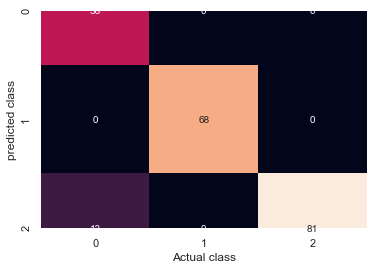

In [557]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('Actual class')
plt.ylabel('predicted class')

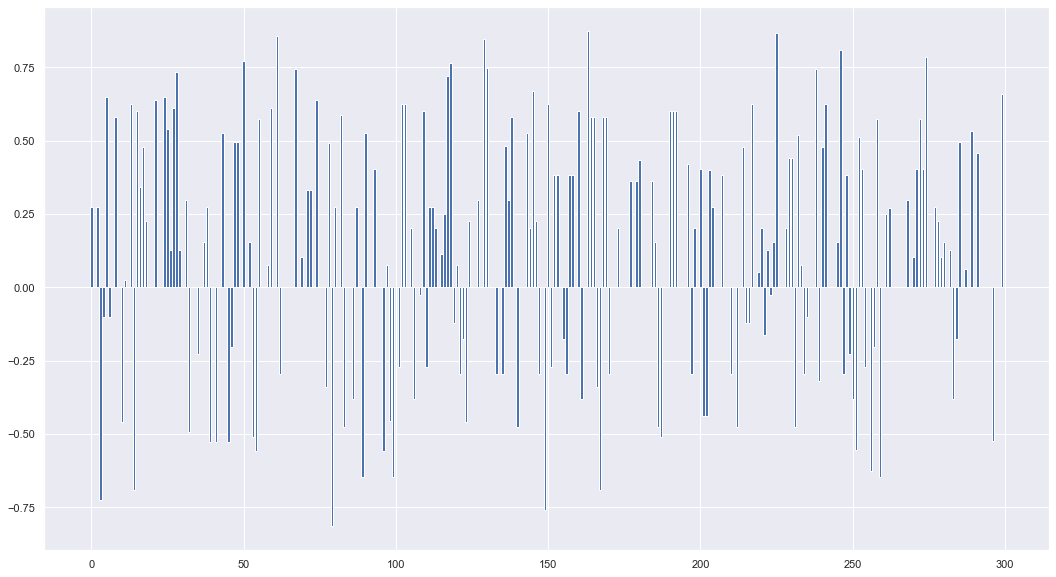

In [558]:

import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
data = pd.read_csv(r"Twitter_News_Sentiment_Raw.csv")
data.head()
df = pd.DataFrame(data)

User = df['Tweets_Ago'].head(1000)
Compound_Score = df['Actual_Compound_Score'].head(1000)

# Figure Size
fig = plt.figure(figsize =(18, 10))

# Horizontal Bar Plot
plt.bar(User[0:300], Compound_Score[0:300])


#Save graph in png format
plt.savefig("Overall_Media_Sentiment.png")

#Display graph
plt.show()

In [11]:
from pycaret.datasets import get_data
twitter_data = get_data('Twitter_News_Sentiment_Raw')


,User,Timestamp,Actual_Compound_Score,Actual_Pos_Score,Actual_neu_Score,Actual_neg_Score,Tweets_Ago,Tweet_Text,Compound_Score,Pos_Score,Neu_Score,Neg_Score
0,do Different.,2021-04-19 06:25:42,0.2732,0.095,0.905,0.000,0,🌍 Ahead of the Pre- @P4Gpartnerships Summit th...,1,1,1,0
1,Ville Kostian,2021-04-19 06:11:30,0.0000,0.000,1.000,0.000,1,"""#Biden pressed on emissions goal as #climate ...",0,0,1,0
2,xprimmcom,2021-04-19 06:09:50,0.2732,0.185,0.701,0.115,2,Climate change-related litigation is a truly g...,1,1,1,1
3,impakterdotcom,2021-04-19 06:06:01,-0.7269,0.000,0.663,0.337,3,"As #climate change continues to worsen, #ecolo...",-1,0,1,1
4,Kratu Energy Solutions,2021-04-19 06:03:11,-0.1027,0.208,0.644,0.148,4,The image tells us the importance of #trees i...,-1,1,1,1


In [2]:
from pycaret.classification import *
exp1 = setup(twitter_data, target = 'Compound_Score')

,Description,Value
0,session_id,6166
1,Target,Compound_Score
2,Target Type,Multiclass
3,Label Encoded,"-1: 0, 0: 1, 1: 2"
4,Original Data,"(1000, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [3]:
#Model Training and Validation 
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9857,1.0000,0.9792,0.9862,0.9856,0.9779,0.9782
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9857,1.0000,0.9881,0.9865,0.9858,0.9782,0.9785
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


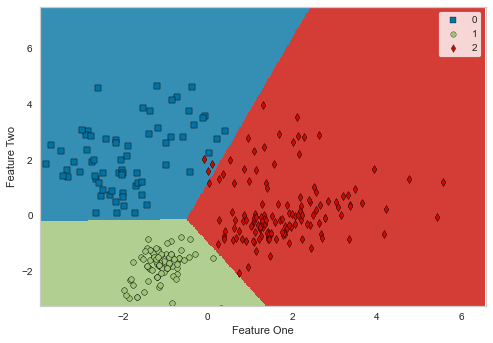

In [4]:
# plot residuals of trained model
plot_model(lr, plot = 'boundary')

In [7]:
# save transformation pipeline and model 
save_model(lr, model_name = 'SocialAnalytics-master')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Tweets_Ago'],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Compound_Score',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerica...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
            